In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The raw data is formated as a text file, so the section describing what the
# variables mean must be removed and column names must be assigned manually to
# make it usable as a .csv.

df = pd.read_csv('CreditDataRaw.csv')
print(df.head())

   person_age  person_income person_home_ownership person_emp_length  \
0          22          59000                  RENT               123   
1          21           9600                   OWN                 5   
2          25           9600              MORTGAGE                 1   
3          23          65500                  RENT                 4   
4          24          54400                  RENT                 8   

  loan_intent loan_grade  loan_amnt loan_int_rate  loan_status  \
0    PERSONAL          D      35000         16.02            1   
1   EDUCATION          B       1000         11.14            0   
2     MEDICAL          C       5500         12.87            1   
3     MEDICAL          C      35000         15.23            1   
4     MEDICAL          C      35000         14.27            1   

   loan_percent_income  cb_person_default_on_file   cb_person_cred_hist_length  
0                 0.59                          Y                            3  
1       

In [134]:
# The dataset's analysis page says that there should be 895 missing values in the
# "person_emp_length" column and 3116 missing values in the "loan_int_rate" column

print(df.isna().sum())
print('')
print(df.isnull().sum())


person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
 cb_person_default_on_file     0
 cb_person_cred_hist_length    0
dtype: int64

person_age                     0
person_income                  0
person_home_ownership          0
person_emp_length              0
loan_intent                    0
loan_grade                     0
loan_amnt                      0
loan_int_rate                  0
loan_status                    0
loan_percent_income            0
 cb_person_default_on_file     0
 cb_person_cred_hist_length    0
dtype: int64


In [135]:
# The dataset uses '?' instead of 'na' or 'null', so summing the values that have '?':

print(df['loan_int_rate'].value_counts()['?'])
print(df['person_emp_length'].value_counts()['?'])

dfA = df[df['loan_int_rate'] != '?']
dfClean = dfA[dfA['person_emp_length'] != '?']

3116
895


In [136]:
# Because the data has '?' in the same columns as numbers, the "person_emp_length"
# and "loan_int_rate" columns are stored as 'objects' and are difficult to use for
# mathematical analysis, and should be changed.

dfClean['loan_int_rate'] = dfClean['loan_int_rate'].astype('float')
dfClean['person_emp_length'] = dfClean['person_emp_length'].astype('float')

print(dfClean.dtypes)

person_age                       int64
person_income                    int64
person_home_ownership           object
person_emp_length              float64
loan_intent                     object
loan_grade                      object
loan_amnt                        int64
loan_int_rate                  float64
loan_status                      int64
loan_percent_income            float64
 cb_person_default_on_file      object
 cb_person_cred_hist_length      int64
dtype: object


/tmp/ipython-input-4218595580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean['loan_int_rate'] = dfClean['loan_int_rate'].astype('float')
/tmp/ipython-input-4218595580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClean['person_emp_length'] = dfClean['person_emp_length'].astype('float')


In [145]:
# The data also seems to have excessively large values in "person_emp_length" which
# seem dubious. For example, several indivuals are recorded as being employed
# for 123 years when they're 20 years old. The "person_age" and "person_income"
# also have impossibly large values.

dfCleanFinal = dfClean[dfClean['person_age'] > dfClean['person_emp_length']]
dfCleanFinal = dfCleanFinal[dfCleanFinal['person_age'] < 120]
dfCleanFinal = dfCleanFinal.drop_duplicates()

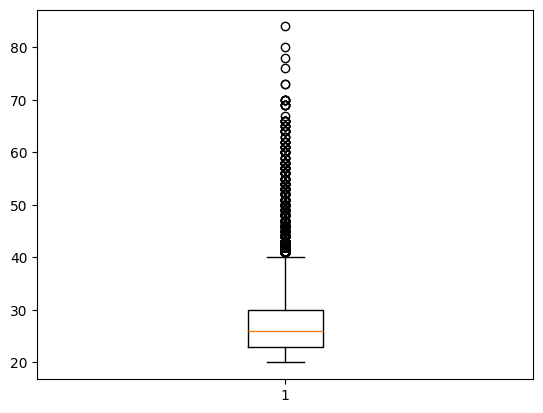

In [146]:
plt.boxplot(dfCleanFinal['person_age'])
plt.show()

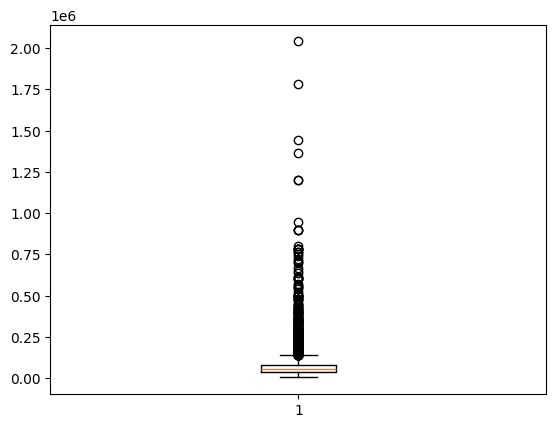

In [147]:
plt.boxplot(dfCleanFinal['person_income'])
plt.show()

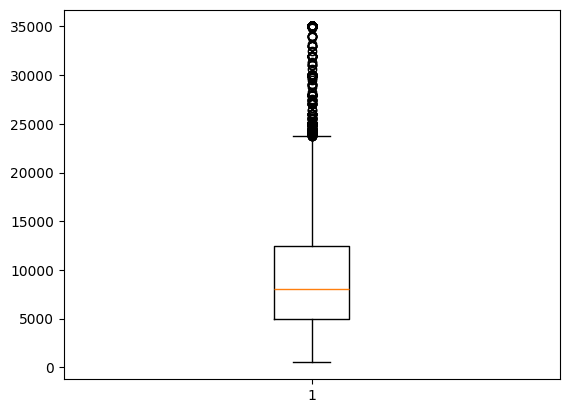

In [148]:
plt.boxplot(dfCleanFinal['loan_amnt'])
plt.show()

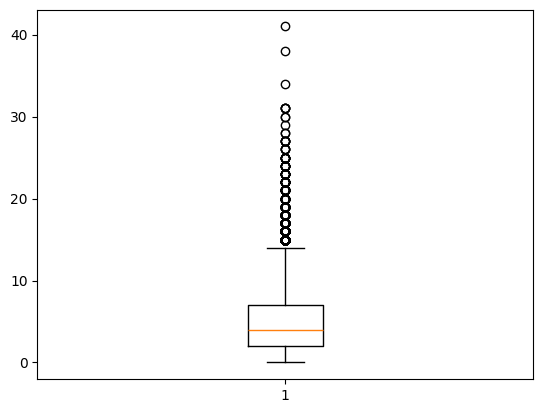

In [149]:
plt.boxplot(dfCleanFinal['person_emp_length'])
plt.show()

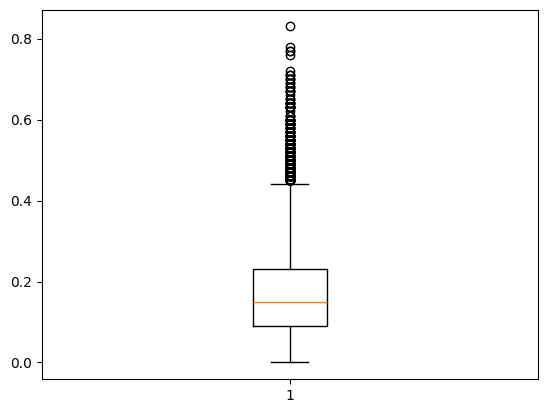

In [150]:
plt.boxplot(dfCleanFinal['loan_percent_income'])
plt.show()

In [143]:
#Click here to download the cleaned dataset.
dfCleanFinal.to_csv('CreditDataClean.csv', index=False)